<a href="https://colab.research.google.com/github/saliiimm/employee-quit-prediction/blob/main/Employee_quit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and modules

In [1]:
#basically i just imported the libraraies i use for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading and Analyzing dataset

In [ ]:
#here we set the options so we can see all the cols when we use pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#here we read the dataframe
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#lets see a sample so we can take a brief analysis of each feature
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1050,42,No,Travel_Frequently,748,Research & Development,9,2,Medical,1,1480,1,Female,74,3,1,Laboratory Technician,4,Single,3673,16458,1,Y,No,13,3,3,80,0,12,3,3,12,9,5,8
1332,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,4,Male,73,2,1,Research Scientist,4,Single,2439,14753,1,Y,Yes,24,4,2,80,0,1,3,2,1,0,1,0
58,31,No,Travel_Rarely,655,Research & Development,7,4,Life Sciences,1,76,4,Male,48,3,2,Laboratory Technician,4,Divorced,5915,9528,3,Y,No,22,4,4,80,1,10,3,2,7,7,1,7
107,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,Yes,11,3,4,80,0,6,1,3,6,4,0,3
1236,36,Yes,Travel_Rarely,1456,Sales,13,5,Marketing,1,1733,2,Male,96,2,2,Sales Executive,1,Divorced,6134,8658,5,Y,Yes,13,3,2,80,3,16,3,3,2,2,2,2
234,33,Yes,Travel_Rarely,813,Research & Development,14,3,Medical,1,325,3,Male,58,3,1,Laboratory Technician,4,Married,2436,22149,5,Y,Yes,13,3,3,80,1,8,2,1,5,4,0,4
925,42,No,Travel_Rarely,603,Research & Development,7,4,Medical,1,1292,2,Female,78,4,2,Research Scientist,2,Married,2372,5628,6,Y,Yes,16,3,4,80,0,18,2,3,1,0,0,0
570,52,No,Non-Travel,715,Research & Development,19,4,Medical,1,791,4,Male,41,3,1,Research Scientist,4,Married,4258,26589,0,Y,No,18,3,1,80,1,5,3,3,4,3,1,2
983,34,No,Travel_Rarely,404,Research & Development,2,4,Technical Degree,1,1383,3,Female,98,3,2,Healthcare Representative,4,Single,6687,6163,1,Y,No,11,3,4,80,0,14,2,4,14,11,4,11
99,44,No,Non-Travel,489,Research & Development,23,3,Medical,1,132,2,Male,67,3,2,Laboratory Technician,2,Married,2042,25043,4,Y,No,12,3,3,80,1,17,3,4,3,2,1,2


In [ ]:
#lets check the type of each one so we can know which one may need encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#check for null or duplicated values
df.isna().values.sum()

0

In [ ]:
df.duplicated().values.sum()

0

In [ ]:
#check for unique values,if a col has only one value it is useless so we remove it completely
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


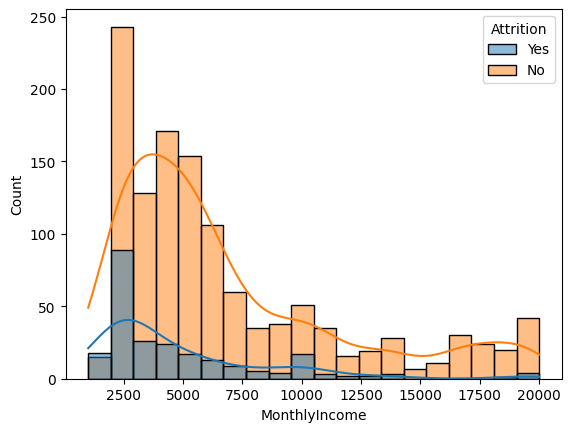

In [ ]:
#lets vuzualize a little bit with histograms ,countplot,boxplot,pie,...
sns.histplot(data= df, x='MonthlyIncome',hue = 'Attrition', kde=True)
plt.show()
#here we can conclude that those with low income may quit more than the others,so the MonthlyIncome feature can be important for our model

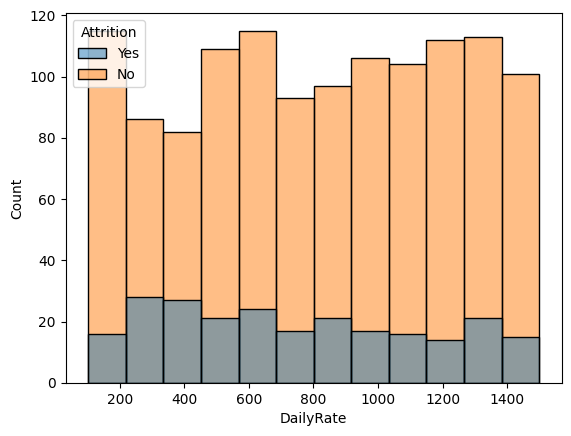

In [ ]:
sns.histplot(data = df,x = 'DailyRate',hue = 'Attrition')
plt.show()
#here we can conclude that dailyRate doesnt have a very big importance ,since there is no significent difference between cols

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

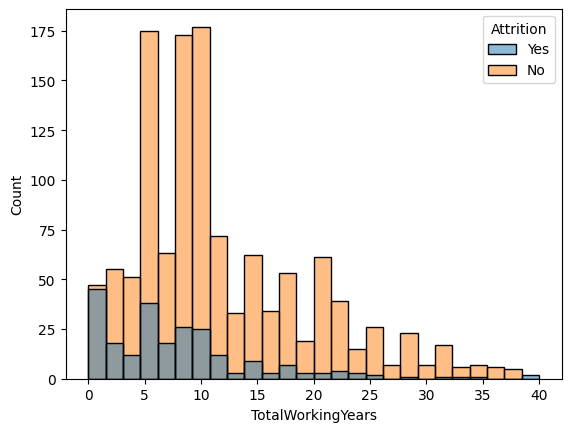

In [ ]:
sns.histplot(data = df,x ='TotalWorkingYears',hue = 'Attrition')
#here we can have the same cocnlusion as monthly income,this feature may be important for later

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

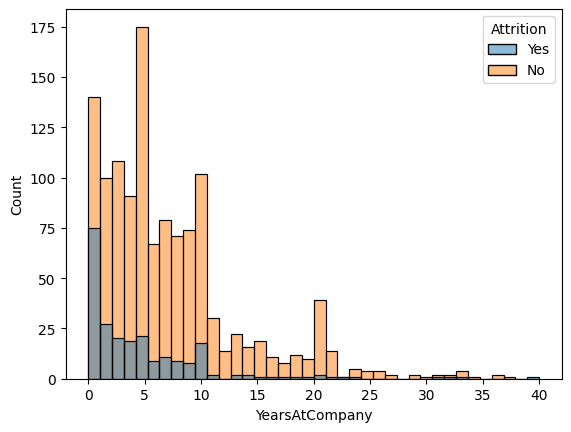

In [ ]:
sns.histplot(data = df,x ='YearsAtCompany',hue = 'Attrition')
#same for this one,as we can see,those with few years at company may quit,i guess that years at company,monthly indome and total working years have logical relations
# between them since they have praticlly the same histplot,we can also conclude that it can be the same for Age:
# because generally  small age =>  small income => small years at company => small total working years

<Axes: xlabel='Department', ylabel='count'>

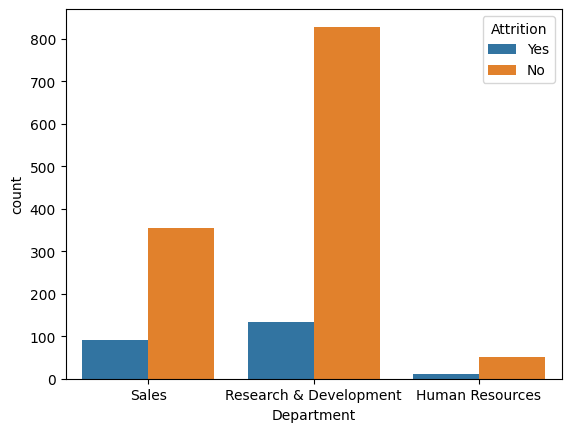

In [ ]:
sns.countplot(x='Department', hue='Attrition', data=df)
#we cant tell now if it is really important,because okay there is a lot of no for R&D,but the effectif isnt the same for all deps
#percantage can have more sens in this case i think

<Axes: xlabel='JobRole', ylabel='count'>

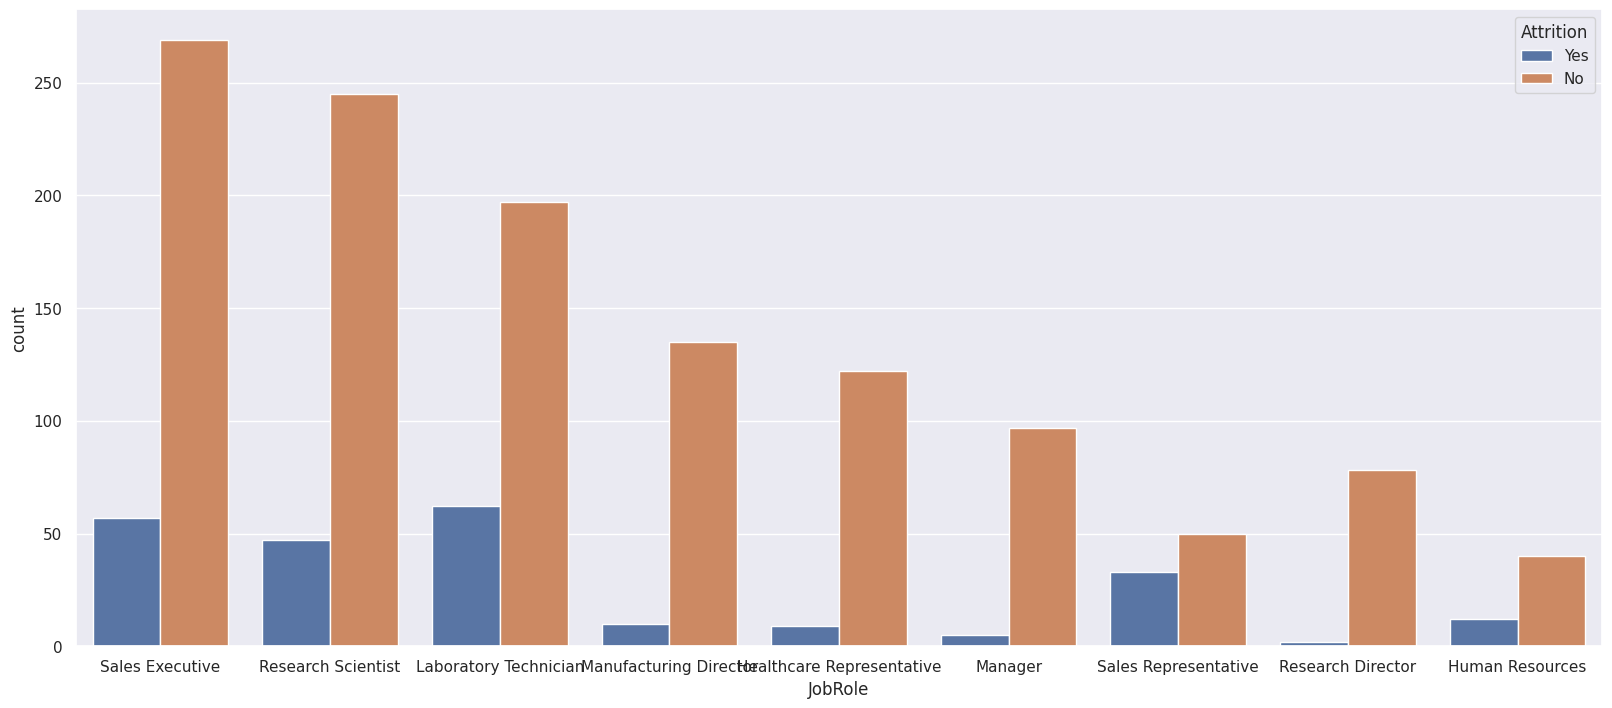

In [4]:
sns.set_theme(rc={'figure.figsize':(19.7,8.27)})
sns.countplot(x='JobRole', hue='Attrition', data=df)
#i think same here,if we look at percentages they may be the same for all deps(3jzt ndir percentages)
#the only dep that can be problematic is the sales representative one,it seems like 45% / 55% which is high compared to others

<Axes: xlabel='BusinessTravel', ylabel='count'>

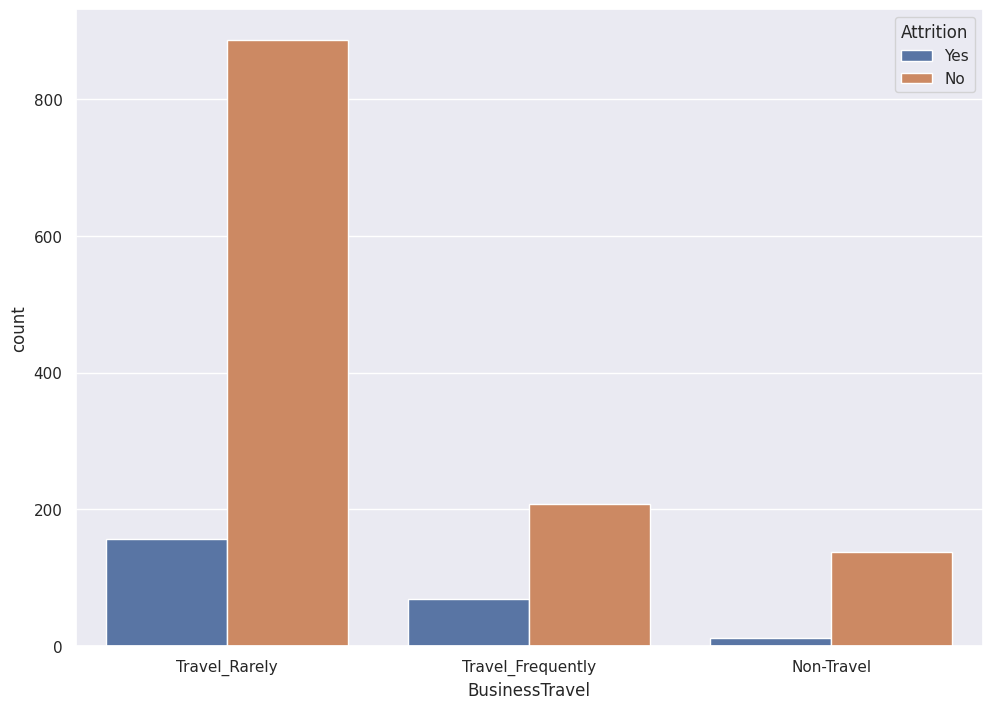

In [ ]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
#we can conclude here that those who dont travel want to go to a job when they give them travels ,may be an important feature

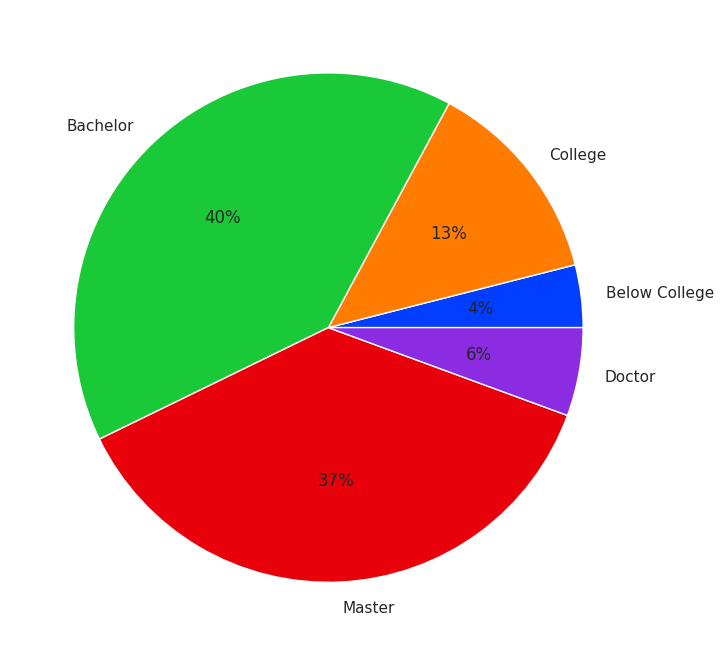

In [ ]:
below_college = df['Education'][df['Education'] == 1].sum()
college = df['Education'][df['Education'] == 2].sum()
bachelor = df['Education'][df['Education'] == 3].sum()
master = df['Education'][df['Education'] == 4].sum()
doctor = df['Education'][df['Education'] == 5].sum()


data = np.array([below_college,college,bachelor,master,doctor])
keys = np.array(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

palette_color = sns.color_palette('bright')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()
#here we can maybe conclude that since in our df we have a lot with only college,below college,bachelor,they may not have access to high level jobs
#so just entry one with basic salary that make them quit quickly,also thats maybe why our df is imbalanced(a lot or yes and few no)

In [ ]:
#here i started analyzing the values more
df.NumCompaniesWorked.unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3])

In [ ]:
#getting correlatioon matrix so we can draw a heatmap
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                               Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
Age                       1.000000   0.010661         -0.001686   0.208034            NaN   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806            NaN   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042            NaN   
Education                 0.208034  -0.016806          0.021042   1.000000            NaN   
EmployeeCount                  NaN        NaN               NaN        NaN            NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070            NaN   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128            NaN   
HourlyRate                0.024287   0.023381          0.031131   0.016775            NaN   
JobInvolvement            0.029820   0.046135          0.008783   0.042438            NaN   
JobLevel                  0.509604   0.002966          0.005303   0.10

<Axes: >

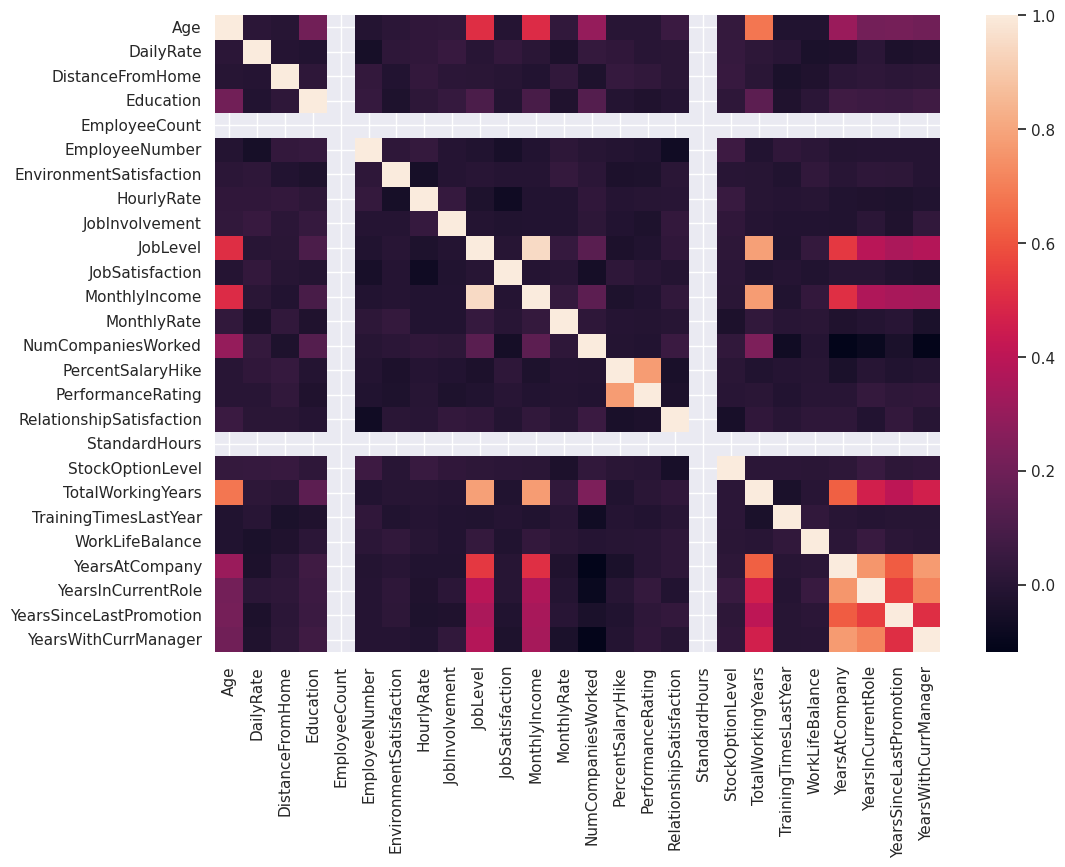

In [ ]:
sns.heatmap(correlation_matrix)
#from the heatmap we can clearly confirm the says i said before about the importance of some features(look at those in red,orange,...)

In [ ]:
#here we see the shape of the df to see if there is enough data to train
df.shape

(1470, 35)

In [ ]:
#see for unique values to know speacially for categorical features what encoding to use
for col in df:
  print(col , df[col].unique())

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

# Data cleaning

In [5]:
#lets start cleaning by removing cols with one unique values,useless
df = df.drop(columns = ['Over18','EmployeeCount','StandardHours'])

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [7]:
#here since there is only 2 values we do binary enccoding
df['Attrition'] =df['Attrition'].replace({'Yes' : 1,'No': 0})
df.head()

<ipython-input-7-b4d081ae4cb0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] =df['Attrition'].replace({'Yes' : 1,'No': 0})


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [8]:
#we do the same here
df['OverTime'] =df['OverTime'].replace({'Yes' : 1,'No': 0})
df.head()

<ipython-input-8-1cad1398c8ee>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OverTime'] =df['OverTime'].replace({'Yes' : 1,'No': 0})


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
#for one hot encoding we will use it for various cols so there is no orb=dinal order between them as we dont want to make the model confused :
#for genders
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')
gender_transformed = ohe.fit_transform(df[['Gender']])
gender_transformed

,Gender_Female,Gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1465,0.0,1.0
1466,0.0,1.0
1467,0.0,1.0
1468,0.0,1.0


In [10]:
gender_encoded_df = pd.concat([df,gender_transformed],axis = 1).drop(columns = ['Gender'])
gender_encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,8,0,1,6,4,0,5,1.0,0.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,10,3,3,10,7,1,7,0.0,1.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,7,3,3,0,0,0,0,0.0,1.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,8,3,3,8,7,3,0,1.0,0.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,1,6,3,3,2,2,2,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,1,17,3,3,5,2,0,3,0.0,1.0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,9,5,3,7,7,1,7,0.0,1.0
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,1,6,0,3,6,2,0,3,0.0,1.0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,0,17,3,2,9,6,0,8,0.0,1.0


In [11]:
df = gender_encoded_df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,8,0,1,6,4,0,5,1.0,0.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,10,3,3,10,7,1,7,0.0,1.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,7,3,3,0,0,0,0,0.0,1.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,8,3,3,8,7,3,0,1.0,0.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,1,6,3,3,2,2,2,2,0.0,1.0


In [12]:
#for marital status
marital_transformed = ohe.fit_transform(df[['MaritalStatus']])
marital_transformed

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1465,0.0,1.0,0.0
1466,0.0,1.0,0.0
1467,0.0,1.0,0.0
1468,0.0,1.0,0.0


In [13]:
marital_encoded_df = pd.concat([df,marital_transformed],axis = 1).drop(columns = ['MaritalStatus'])
marital_encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,6,4,0,5,1.0,0.0,0.0,0.0,1.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,3,10,7,1,7,0.0,1.0,0.0,1.0,0.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,0,0,0,0,0.0,1.0,0.0,0.0,1.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,8,7,3,0,1.0,0.0,0.0,1.0,0.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,2,2,2,2,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,5,2,0,3,0.0,1.0,0.0,1.0,0.0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,7,7,1,7,0.0,1.0,0.0,1.0,0.0
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,3,6,2,0,3,0.0,1.0,0.0,1.0,0.0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,2,9,6,0,8,0.0,1.0,0.0,1.0,0.0


In [14]:
df = marital_encoded_df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,6,4,0,5,1.0,0.0,0.0,0.0,1.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,3,10,7,1,7,0.0,1.0,0.0,1.0,0.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,0,0,0,0,0.0,1.0,0.0,0.0,1.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,8,7,3,0,1.0,0.0,0.0,1.0,0.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,2,2,2,2,0.0,1.0,0.0,1.0,0.0


In [15]:
#for departement
dep_transformed = ohe.fit_transform(df[['Department']])
dep_transformed

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1465,0.0,1.0,0.0
1466,0.0,1.0,0.0
1467,0.0,1.0,0.0
1468,0.0,0.0,1.0


In [16]:
dep_encoded_df = pd.concat([df,dep_transformed],axis = 1).drop(columns = ['Department'])
dep_encoded_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,Travel_Rarely,1102,1,2,Life Sciences,1,2,94,...,0,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,Travel_Frequently,279,8,1,Life Sciences,2,3,61,...,1,7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,Travel_Rarely,1373,2,2,Other,4,4,92,...,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33,0,Travel_Frequently,1392,3,4,Life Sciences,5,4,56,...,3,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,Travel_Rarely,591,2,1,Medical,7,1,40,...,2,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,23,2,Medical,2061,3,41,...,0,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1466,39,0,Travel_Rarely,613,6,1,Medical,2062,4,42,...,1,7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1467,27,0,Travel_Rarely,155,4,3,Life Sciences,2064,2,87,...,0,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,49,0,Travel_Frequently,1023,2,3,Medical,2065,4,63,...,0,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [17]:
df = dep_encoded_df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,Travel_Rarely,1102,1,2,Life Sciences,1,2,94,...,0,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,Travel_Frequently,279,8,1,Life Sciences,2,3,61,...,1,7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,Travel_Rarely,1373,2,2,Other,4,4,92,...,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33,0,Travel_Frequently,1392,3,4,Life Sciences,5,4,56,...,3,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,Travel_Rarely,591,2,1,Medical,7,1,40,...,2,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
#for education field
edu_transformed = ohe.fit_transform(df[['EducationField']])
df = pd.concat([df,edu_transformed],axis = 1).drop(columns = ['EducationField'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,Travel_Rarely,1102,1,2,1,2,94,3,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,0,Travel_Frequently,279,8,1,2,3,61,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,1,Travel_Rarely,1373,2,2,4,4,92,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0,Travel_Frequently,1392,3,4,5,4,56,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,0,Travel_Rarely,591,2,1,7,1,40,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#for job role
edu_transformed = ohe.fit_transform(df[['JobRole']])
df = pd.concat([df,edu_transformed],axis = 1).drop(columns = ['JobRole'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,Travel_Rarely,1102,1,2,1,2,94,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49,0,Travel_Frequently,279,8,1,2,3,61,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,1,Travel_Rarely,1373,2,2,4,4,92,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,0,Travel_Frequently,1392,3,4,5,4,56,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,0,Travel_Rarely,591,2,1,7,1,40,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#now we use ordinal encoding for travel because there is an order to respect in this one and the higher the better
from sklearn.preprocessing import OrdinalEncoder
b_travel = np.array(['Non-Travel','Travel_Rarely','Travel_Frequently' ])
educ_oe = OrdinalEncoder(categories = [b_travel])
df['BusinessTravel'] = educ_oe.fit_transform(df[['BusinessTravel']])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1.0,1102,1,2,1,2,94,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49,0,2.0,279,8,1,2,3,61,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1.0,1373,2,2,4,4,92,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,0,2.0,1392,3,4,5,4,56,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,0,1.0,591,2,1,7,1,40,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


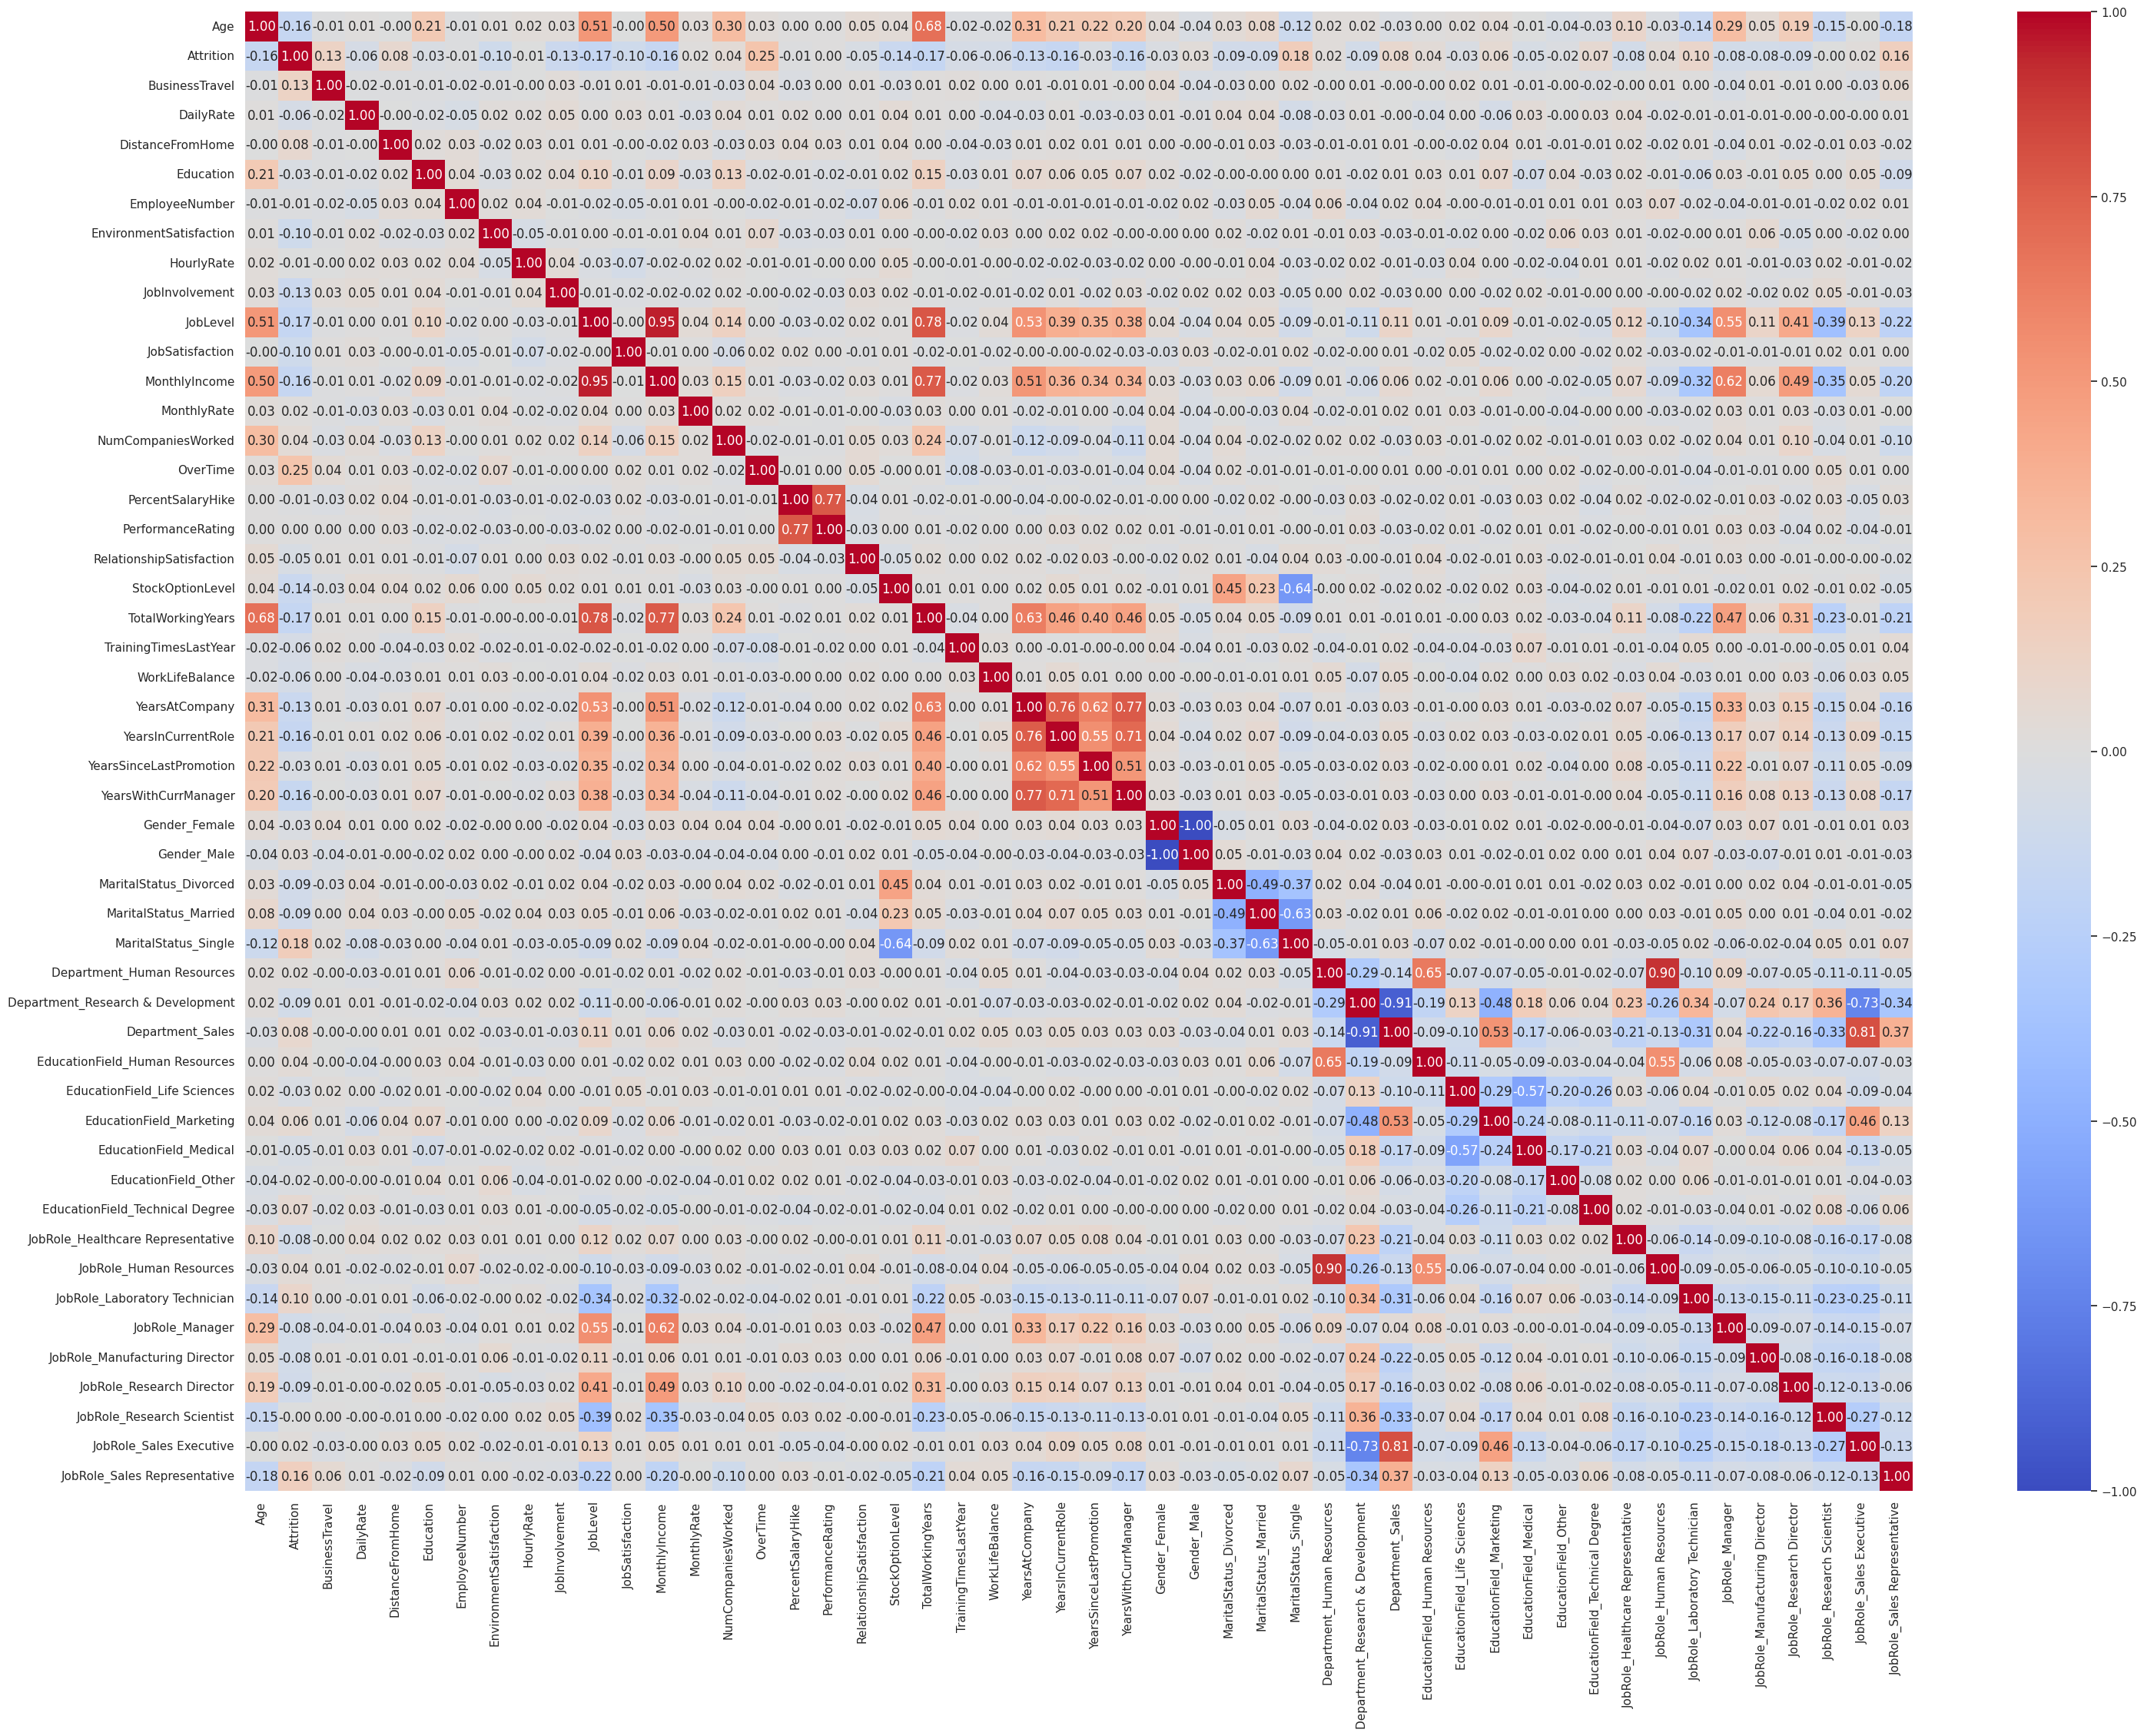

In [ ]:
plt.figure(figsize=(35, 25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
#i just wanted to test the seaborn heatmap,and maybe after transformation see other important cols better but not really concluent

In [ ]:
df.Attrition.value_counts()
#from this we can conclued that our data is really imbalanced,we will try first to find a solution by doing downsampling

,count
Attrition,
0,1233
1,237


In [ ]:
df.Attrition.dtype

dtype('int64')

In [ ]:
#lets use resample from skleanr to do downsampling
#our 'minority' is yes,so we will remove some no
from sklearn.utils import resample


minority_class = df[df['Attrition'] == 1]
majority_class = df[df['Attrition'] == 0]

majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
#now here we have a balanced data we can use
balanced_data = pd.concat([minority_class, majority_downsampled])

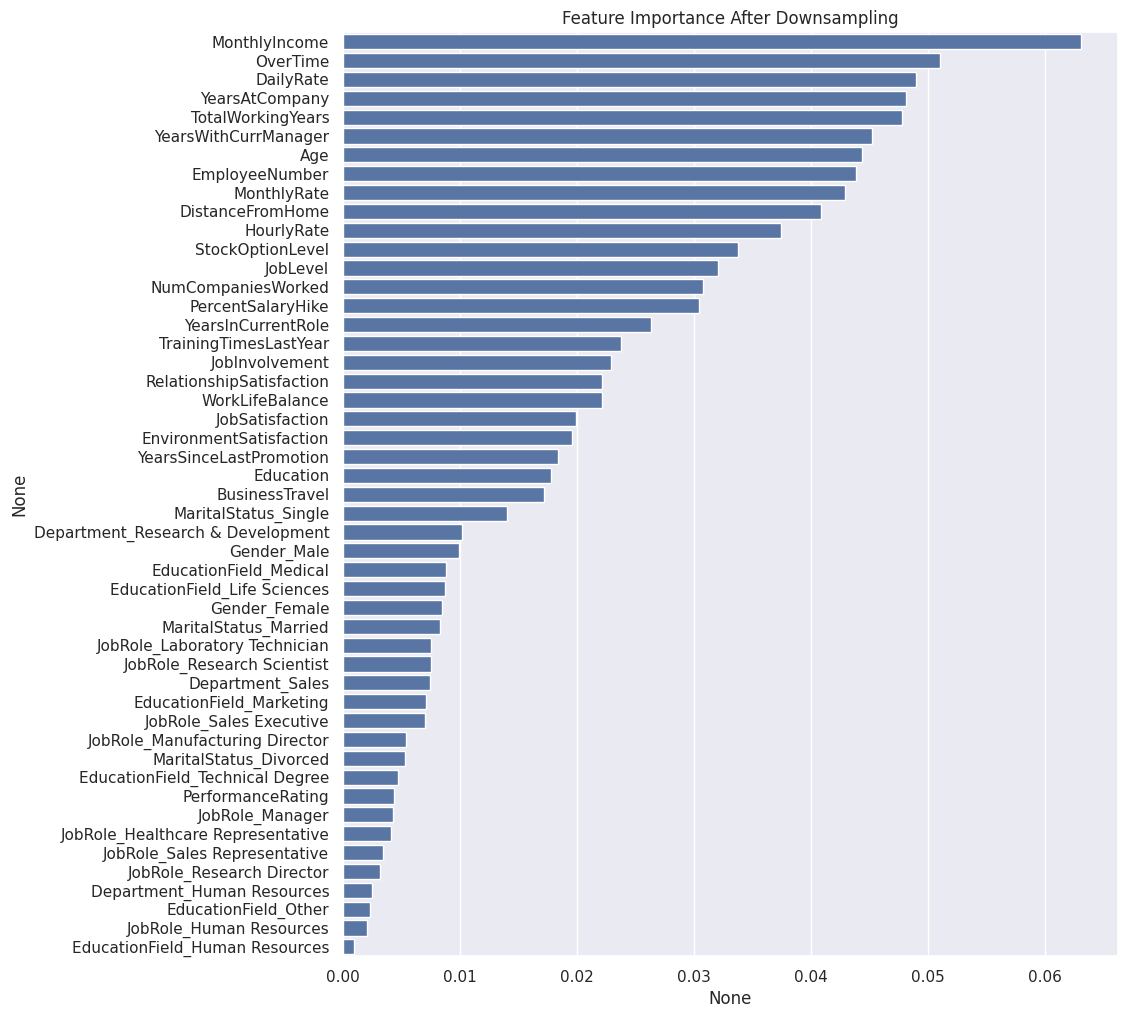

In [ ]:
#after some research i found out that we can see the best features using randomForest,so why not using it since we have a lot of features specially after encoding
from sklearn.ensemble import RandomForestClassifier

X = balanced_data.drop(columns=['Attrition'])
y = balanced_data['Attrition']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
#we will use model.feature_importances for this
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 12))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance After Downsampling")
plt.show()
#as we can see we can confirm another time that monthlyincome,daily rate,years at company,age, are important factors
#surprisingly overtime is a really important one,not that much for hourlyRate

In [ ]:
from sklearn.model_selection import train_test_split
#spoiler : i have tested before training with all data but wasnt that good,i also started with the best 10,the best 15 ones,wasnt really good so i went to 20 here
top_features = feature_importance.nlargest(20).index
X= X[top_features]
y = balanced_data['Attrition']
#so we base our training data using the top 20 features only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#after a lot of thinking ,i concluded that the best models that we may use here are LogisticRegression,random forest adn XGBoost
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#making a object so i can test them the 3 one after the other using a loop
#in each loop i see the accuracy,confusion matrix and classification report
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
#as we can see the resulsts are not that good,so we will try to make it better


Training Random Forest:
Accuracy: 0.7263
Confusion Matrix:
[[34 14]
 [12 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        48
           1       0.71      0.74      0.73        47

    accuracy                           0.73        95
   macro avg       0.73      0.73      0.73        95
weighted avg       0.73      0.73      0.73        95


Training Logistic Regression:
Accuracy: 0.6526
Confusion Matrix:
[[28 20]
 [13 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        48
           1       0.63      0.72      0.67        47

    accuracy                           0.65        95
   macro avg       0.66      0.65      0.65        95
weighted avg       0.66      0.65      0.65        95


Training XGBoost:
Accuracy: 0.5895
Confusion Matrix:
[[27 21]
 [18 29]]
Classification Report:
              precision    recall  f1-sc

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:53:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#lets try Recursive Feature Elimination with randomforestclasifier this time for better fiding of the best features
from sklearn.feature_selection import RFE

selector = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
#but it had the same resuslts,i think it is the same think as the previous one.
#when we see the shape we remark that the porblem may not be with the features actually but with the downsampling
#there is too few data compared to before

Selected Features: Index(['MonthlyIncome', 'OverTime', 'DailyRate', 'YearsAtCompany', 'TotalWorkingYears',
       'YearsWithCurrManager', 'Age', 'EmployeeNumber', 'MonthlyRate', 'DistanceFromHome',
       'HourlyRate', 'StockOptionLevel', 'JobLevel', 'NumCompaniesWorked', 'PercentSalaryHike',
       'YearsInCurrentRole', 'TrainingTimesLastYear', 'JobInvolvement', 'RelationshipSatisfaction',
       'WorkLifeBalance'],
      dtype='object')
X_train shape: (379, 20)
X_test shape: (95, 20)


In [ ]:
#so lets upsample
minority_upsampled = resample(minority_class, replace=True,  n_samples=len(majority_class),  random_state=42)

balanced_upsampled_data = pd.concat([majority_class, minority_upsampled])

In [ ]:
#lets find the best features again with the upsample one,we will remark few changes in the classment
selector = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Selected Features: Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
X_train shape: (1972, 20)
X_test shape: (494, 20)


In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
 #and as we can see the remarks paid well with 0.96 accuracy for random forest and 0.95 for XGBoost
 #but maybe the model learned the dataset,we dont have tobe that happy
 #maybe a huge variance is waiting for us
 #to confirm this result we have to test it on another dataset!
 #thats it for the moment!


Training Random Forest:
Accuracy: 0.9696
Confusion Matrix:
[[236  12]
 [  3 243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       248
           1       0.95      0.99      0.97       246

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494


Training Logistic Regression:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7004
Confusion Matrix:
[[161  87]
 [ 61 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       248
           1       0.68      0.75      0.71       246

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494


Training XGBoost:
Accuracy: 0.9555
Confusion Matrix:
[[228  20]
 [  2 244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       248
           1       0.92      0.99      0.96       246

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494

